<a href="https://colab.research.google.com/github/Antonio-B85/challenge-TelecomX-parte2-Latam/blob/main/TelecomX_Parte2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [618]:
# importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')

In [619]:
# conectar a Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [726]:
# Rutas Drive
path = '/content/drive/MyDrive/Data_Science/Challenges/TelecomX-2/TelecomX_Data_Estandarizado.csv'

datos = pd.read_csv(path)
datos_org = datos.copy()
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [621]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [622]:
datos.shape

(7267, 22)

In [623]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

#🔧 Transformación

##Eliminar Columnas Irrelevantes

In [624]:
# Eliminar la columna 'customerID'
datos = datos.drop(columns=['customerID'])
# Mostrar el DataFrame resultante
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


##Tratar Columnas Categóricas Binarias

In [625]:
datos.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,76.021140
std,0.369074,24.571773,30.129572,2266.915104,75.563837
min,0.000000,0.000000,18.250000,18.800000,0.626667
25%,0.000000,9.000000,35.425000,401.400000,13.380000
50%,0.000000,29.000000,70.300000,1394.550000,46.485000
75%,0.000000,55.000000,89.875000,3778.525000,125.950833
max,1.000000,72.000000,118.750000,8684.800000,289.493333


In [626]:
datos.describe(include='O')

,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445


In [627]:
conteos_valores = datos['Churn'].value_counts()
conteos_valores

,count
Churn,
No,5174
Yes,1869
No Info,224


In [628]:
# Eliminar las filas donde 'Churn' es igual a 'No Info'
datos = datos[datos['Churn'] != 'No Info']
conteos_valores = datos['Churn'].value_counts()
conteos_valores

,count
Churn,
No,5174
Yes,1869


In [629]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

In [630]:
# Restablecer los índices
datos.reset_index(drop=True, inplace=True)
datos.tail()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
7038,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,24.763333
7039,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,62.456667
7040,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,3.091667
7041,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,154.255000
7042,No,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60,123.586667


In [631]:
datos.describe(include='O')

,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [632]:
#Ajuste de datos
datos['Churn'] = datos['Churn'].replace({'No': 0, 'Yes': 1})
datos['gender'] = datos['gender'].replace({'Female': 0, 'Male': 1})
datos['Partner'] = datos['Partner'].replace({'No': 0, 'Yes': 1})
datos['Dependents'] = datos['Dependents'].replace({'No': 0, 'Yes': 1})
datos['PhoneService'] = datos['PhoneService'].replace({'No': 0, 'Yes': 1})
datos['PaperlessBilling'] = datos['PaperlessBilling'].replace({'No': 0, 'Yes': 1})

In [633]:
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,0,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,19.776667
1,0,1,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,18.080000
2,1,1,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,9.361667
3,1,1,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,41.261667
4,1,0,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,8.913333


In [634]:
datos.describe(include='O')

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,3,3,3,3,3,3,3,3,4
top,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


In [635]:
conteos_valores = datos['MultipleLines'].value_counts()
conteos_valores

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


##Tratar Columnas Categóricas No Binarias

In [636]:
datos.describe(include='O')

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,3,3,3,3,3,3,3,3,4
top,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


In [637]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

datos_2 = datos.describe(include='O').copy()
datos_2.columns

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [638]:
categoricas = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod']
categoricas

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [639]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No'

In [640]:
datos.columns = datos.columns.str.replace('^remainder__', '', regex=True)
datos.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No'

In [641]:
datos.sample(10)

,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,...,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
2319,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.0,1.0,1.0,19.50,413.00,13.766667
3055,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,14.0,1.0,1.0,90.90,1259.00,41.966667
1010,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,4.0,1.0,0.0,49.25,208.45,6.948333
6431,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,15.0,1.0,1.0,55.70,899.80,29.993333
5448,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,10.0,1.0,0.0,20.35,176.30,5.876667
2846,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,3.0,1.0,0.0,45.45,141.70,4.723333
5491,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,66.0,1.0,1.0,19.75,1344.50,44.816667
953,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,16.0,1.0,1.0,80.55,1248.90,41.630000
2946,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,0.0,20.35,33.20,1.106667
1814,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,65.0,1.0,0.0,76.15,4929.55,164.318333


In [642]:
datos.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No'

#📊 Carga y análisis

##Verificación de la Proporción de Cancelación (Churn)

In [643]:
datos_churn = datos.groupby('Churn').size().reset_index(name='count')
datos_churn

,Churn,count
0,0.0,5174
1,1.0,1869


In [644]:
datos_churn.columns

Index(['Churn', 'count'], dtype='object')

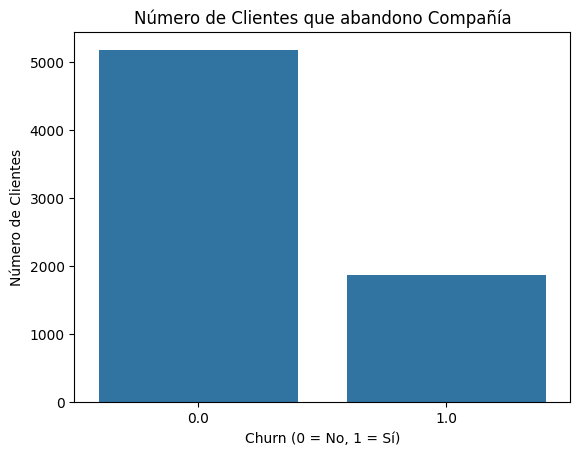

In [645]:
import seaborn as sns

sns.barplot(data=datos_churn, x='Churn', y='count')
plt.title('Número de Clientes que abandono Compañía')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Número de Clientes')
plt.show()

##Análisis Dirigido

###Tiempo de contrato × Cancelación

In [766]:
datos_org.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [767]:
columnas_contrato = [col for col in datos_org.columns if 'Contract' in col]
columnas_analisis = columnas_contrato + ['Churn']
# Crear nuevo DataFrame
df_contrato_churn = datos_org[columnas_analisis].copy()
df_contrato_churn

,Contract,Churn
0,One year,No
1,Month-to-month,No
2,Month-to-month,Yes
3,Month-to-month,Yes
4,Month-to-month,Yes
...,...,...
7262,One year,No
7263,Month-to-month,Yes
7264,Month-to-month,No
7265,Two year,No


In [768]:
df_contrato_churn.columns

Index(['Contract', 'Churn'], dtype='object')

In [769]:
df_contrato_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contract  7267 non-null   object
 1   Churn     7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [770]:
df_contrato_churn['Churn'] = df_contrato_churn['Churn'].replace({'No': 0, 'Yes': 1})
df_contrato_churn.head()

,Contract,Churn
0,One year,0
1,Month-to-month,0
2,Month-to-month,1
3,Month-to-month,1
4,Month-to-month,1


In [771]:
# Eliminar las filas donde 'Churn' es igual a 'No Info'
df_contrato_churn = df_contrato_churn[datos['Churn'] != 'No Info']
conteos_valores = df_contrato_churn['Churn'].value_counts()
conteos_valores

,count
Churn,
0,5174
1,1869


In [772]:
valores_unicos_lista = df_contrato_churn['Contract'].unique().tolist()
print(valores_unicos_lista)

['One year', 'Month-to-month', 'Two year']


In [773]:
df_contrato_churn.columns

Index(['Contract', 'Churn'], dtype='object')

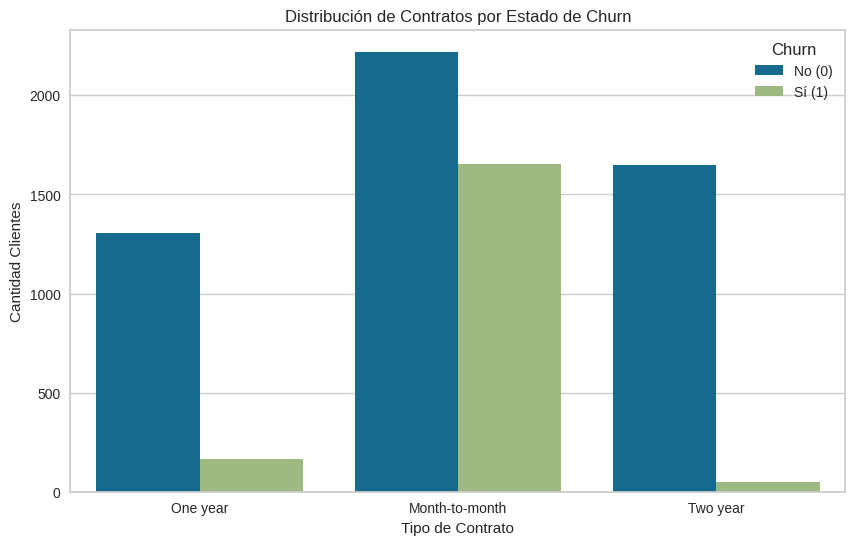

In [774]:
# Gráfico con distribución por Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_contrato_churn, x='Contract', hue='Churn')
plt.title('Distribución de Contratos por Estado de Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad Clientes')
plt.legend(title='Churn', labels=['No (0)', 'Sí (1)'])
plt.show()

###Gasto total × Cancelación

In [763]:
datos_org.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [775]:
columnas_gasto_total = [col for col in datos_org.columns if 'Charges.Total' in col]
columnas_analisis = columnas_gasto_total + ['Churn']
# Crear nuevo DataFrame
df_gasto_total_churn = datos_org[columnas_analisis].copy()
df_gasto_total_churn.head()

,Charges.Total,Churn
0,593.30,No
1,542.40,No
2,280.85,Yes
3,1237.85,Yes
4,267.40,Yes


In [776]:
df_gasto_total_churn.columns

Index(['Charges.Total', 'Churn'], dtype='object')

In [777]:
df_gasto_total_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Charges.Total  7267 non-null   float64
 1   Churn          7267 non-null   object 
dtypes: float64(1), object(1)
memory usage: 113.7+ KB


In [778]:
df_gasto_total_churn['Churn'] = df_gasto_total_churn['Churn'].replace({'No': 0, 'Yes': 1})
df_gasto_total_churn.head()

,Charges.Total,Churn
0,593.30,0
1,542.40,0
2,280.85,1
3,1237.85,1
4,267.40,1


In [779]:
# Eliminar las filas donde 'Churn' es igual a 'No Info'
df_gasto_total_churn = df_gasto_total_churn[datos['Churn'] != 'No Info']
conteos_valores = df_gasto_total_churn['Churn'].value_counts()
conteos_valores

,count
Churn,
0,5174
1,1869


In [780]:
df_gasto_total_churn.columns

Index(['Charges.Total', 'Churn'], dtype='object')

In [786]:
# Agrupar los datos por Churn y sumar los Charges.total
df_gasto_total_churn = df_gasto_total_churn.groupby('Churn')['Charges.Total'].sum().reset_index()

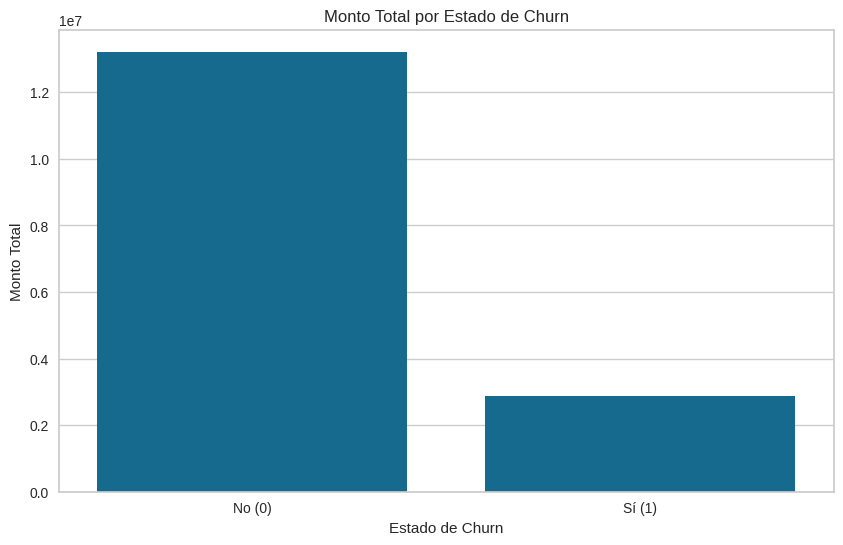

In [788]:
# Gráfico con distribución por Churn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_gasto_total_churn, x='Churn', y='Charges.Total')
plt.title('Monto Total por Estado de Churn')
plt.xlabel('Estado de Churn')
plt.ylabel('Monto Total')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Sí (1)'])  # Etiquetas personalizadas para el eje X
plt.show()

##Analizando Balance de datos

In [646]:
X = datos.drop('Churn', axis=1)
y = datos['Churn']

In [647]:
from sklearn.tree import DecisionTreeClassifier

modelo_dtc = DecisionTreeClassifier()
modelo_dtc.fit(X, y)
print(f'La exactitud del modelo es: {modelo_dtc.score(X, y)}')

La exactitud del modelo es: 0.9974442709072838


##Validando modelo

In [648]:
from sklearn.model_selection import train_test_split

In [649]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [650]:
modelo_dtc = DecisionTreeClassifier()
modelo_dtc.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo_dtc.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo_dtc.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.9975495656048118
La exactitud del modelo con el conjunto de validación es: 0.7334669338677354


In [651]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
modelo_dtc.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo_dtc.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo_dtc.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.8903987525061261
La exactitud del modelo con el conjunto de validación es: 0.7655310621242485


##Evaluando el modelo

In [652]:
from sklearn.metrics import confusion_matrix

In [653]:
y_previsto = modelo_dtc.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[949 151]
 [200 197]]


In [654]:
from sklearn.metrics import ConfusionMatrixDisplay

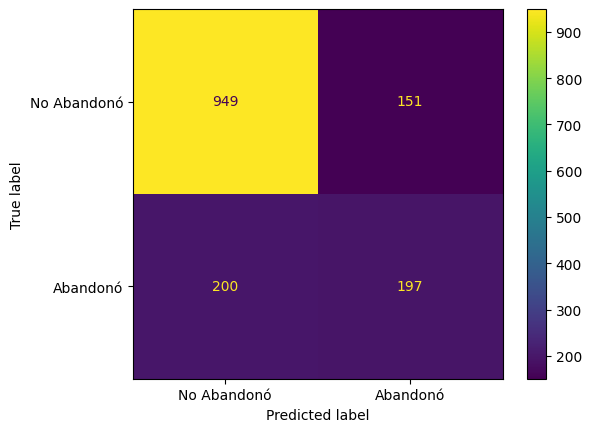

In [655]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['No Abandonó', 'Abandonó'])
visualizacion.plot();

## Métricas de evaluación

### Exactitud, precisión y recall (sensibilidad).

In [656]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [657]:
print(f'La precisión del modelo es: {precision_score(y_val, y_previsto)}')
print(f'La sensibilidad (recall) del modelo es: {recall_score(y_val, y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}')
print(f'La F1-score del modelo es: {f1_score(y_val, y_previsto)}')

La precisión del modelo es: 0.5660919540229885
La sensibilidad (recall) del modelo es: 0.49622166246851385
La exactitud (accuracy) del modelo es: 0.7655310621242485
La F1-score del modelo es: 0.5288590604026846


###Curva ROC


In [658]:
from sklearn.metrics import RocCurveDisplay

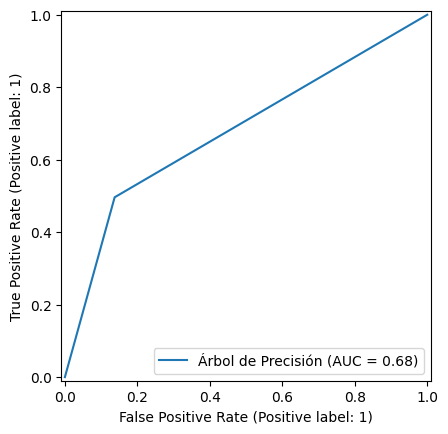

In [659]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árbol de Precisión');

In [660]:
from sklearn.metrics import roc_auc_score

In [661]:
print(f'El área bajo la curva es: {roc_auc_score(y_val, y_previsto)}')

El área bajo la curva es: 0.6794744675978933


###Curva de precisión x sensibilidad

In [662]:
from sklearn.metrics import PrecisionRecallDisplay

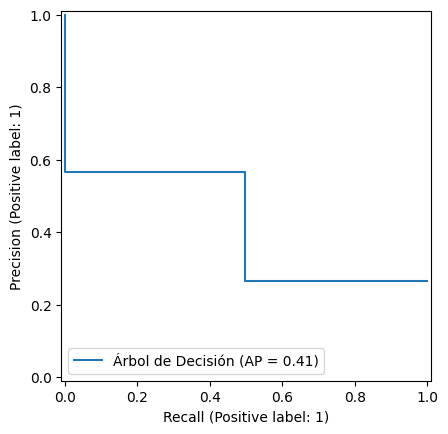

In [663]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árbol de Decisión');

In [664]:
from sklearn.metrics import average_precision_score

In [665]:
print(f'El score promedio de Precisión vs Recall es: {average_precision_score(y_val, y_previsto)}')

El score promedio de Precisión vs Recall es: 0.4145076249374745


###Informe de métricas

In [666]:
from sklearn.metrics import classification_report

In [667]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      1100
         1.0       0.57      0.50      0.53       397

    accuracy                           0.77      1497
   macro avg       0.70      0.68      0.69      1497
weighted avg       0.76      0.77      0.76      1497



##Validación cruzada

###Kfold

In [668]:
from sklearn.model_selection import KFold, cross_validate

In [669]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.03762794, 0.03970838, 0.03821278, 0.03661895, 0.03934383]),
 'score_time': array([0.00269461, 0.00269532, 0.00261974, 0.00329304, 0.00325394]),
 'test_score': array([0.76627713, 0.75522139, 0.74770259, 0.75355054, 0.75104428])}

In [670]:
cv_resultados['test_score']

array([0.76627713, 0.75522139, 0.74770259, 0.75355054, 0.75104428])

In [671]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio típico es de: {desvio_std}')
print(f'El Intervalo de confianza es: [{(promedio-2*desvio_std), (min(promedio+2*desvio_std,1))}]')

El promedio de exactitud es de: 0.7547591851080121
El desvio típico es de: 0.006291796944818274
El Intervalo de confianza es: [(np.float64(0.7421755912183755), np.float64(0.7673427789976487))]


###Validación cruzada con sensibilidad

In [672]:
def intervalo_confianza(resultado):
  promedio = resultado['test_score'].mean()
  desvio_std = resultado['test_score'].std()
  return f'El Intervalo de confianza es: [{(promedio-2*desvio_std), (min(promedio+2*desvio_std,1))}]'

In [673]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.04158306, 0.03919053, 0.04030991, 0.04481363, 0.03975701]),
 'score_time': array([0.00721192, 0.00550866, 0.0077157 , 0.00506139, 0.00582147]),
 'test_score': array([0.44224422, 0.5601173 , 0.47384615, 0.49683544, 0.46381579])}

In [674]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring='precision')
cv_resultados

{'fit_time': array([0.04073763, 0.03808284, 0.03739262, 0.03676915, 0.03814769]),
 'score_time': array([0.00598907, 0.00513315, 0.00485826, 0.00497317, 0.00570107]),
 'test_score': array([0.53383459, 0.56508876, 0.53819444, 0.53979239, 0.49652778])}

In [675]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring='f1')
cv_resultados

{'fit_time': array([0.04502821, 0.03706169, 0.03978944, 0.03714561, 0.03920364]),
 'score_time': array([0.00526834, 0.00528193, 0.00514102, 0.00493455, 0.00531697]),
 'test_score': array([0.48833034, 0.54896142, 0.50825083, 0.51803279, 0.48972603])}

In [676]:
intervalo_confianza(cv_resultados)

'El Intervalo de confianza es: [(np.float64(0.4662620279273869), np.float64(0.5550585339967987))]'

##Balanceo de los datos

### Estratificando los datos

In [677]:
datos['Churn'].value_counts(normalize=True)

,proportion
Churn,
0.0,0.73463
1.0,0.26537


In [678]:
def intervalo_confianza(resultado):
  promedio = resultado['test_score'].mean()
  desvio_std = resultado['test_score'].std()
  return f'El Intervalo de confianza es: [{(promedio-2*desvio_std), (min(promedio+2*desvio_std,1))}]'

In [679]:
from sklearn.model_selection import StratifiedKFold

In [680]:
modelo_skf = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_skf, X, y, cv=skf, scoring='recall')


In [681]:
intervalo_confianza(cv_resultados)

'El Intervalo de confianza es: [(np.float64(0.4603963448680274), np.float64(0.5402147298695875))]'

###Oversampling

In [682]:
from imblearn.over_sampling import SMOTE

In [683]:
oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(X, y)

In [684]:
y_balanceada.value_counts(normalize=True)

,proportion
Churn,
0.0,0.5
1.0,0.5


In [685]:
modelo_over = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_over, x_balanceada, y_balanceada, cv=skf, scoring='recall')

In [686]:
intervalo_confianza(cv_resultados)

'El Intervalo de confianza es: [(np.float64(0.7997540095690197), np.float64(0.8636424119843984))]'

###Pipeline para validación

In [687]:
from imblearn.pipeline import Pipeline as imbpipeline

In [688]:
modelo_pip = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()),('arbol', modelo_pip)])

In [689]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [690]:
intervalo_confianza(cv_resultados)

'El Intervalo de confianza es: [(np.float64(0.4934848603456196), np.float64(0.6809492011189757))]'

###Undersampling

In [691]:
from imblearn.under_sampling import NearMiss

In [692]:
modelo_und = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('udersample', NearMiss(version=3)),('arbol', modelo_und)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [693]:
intervalo_confianza(cv_resultados)

'El Intervalo de confianza es: [(np.float64(0.53649607225001), np.float64(0.7674263133222775))]'

### Probando el modelo Oversampling

In [694]:
oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(X, y)

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       777
         1.0       0.59      0.60      0.59       280

    accuracy                           0.78      1057
   macro avg       0.72      0.72      0.72      1057
weighted avg       0.78      0.78      0.78      1057



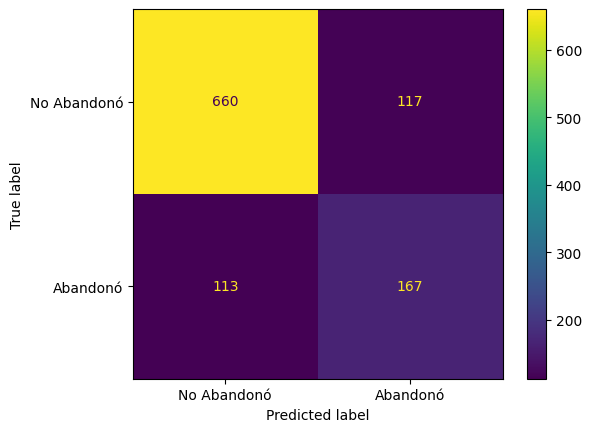

In [695]:
modelo_over = DecisionTreeClassifier(max_depth=10)
modelo_over.fit(x_balanceada, y_balanceada)
y_previsto = modelo_over.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto, display_labels=['No Abandonó', 'Abandonó']);

##Definiendo una Baseline

In [696]:
datos.sample(10)

,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,...,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
5605,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,23.0,1.0,0.0,85.60,1868.40,62.280000
2619,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,66.0,1.0,1.0,25.70,1714.55,57.151667
1058,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,71.0,1.0,1.0,99.00,6994.60,233.153333
6738,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,64.0,1.0,0.0,99.25,6549.45,218.315000
6097,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,69.0,1.0,1.0,104.70,7220.35,240.678333
6593,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,33.0,1.0,1.0,80.60,2656.50,88.550000
6073,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,38.0,1.0,0.0,74.05,2802.30,93.410000
119,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,15.0,1.0,0.0,105.10,1582.75,52.758333
4675,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,50.0,0.0,1.0,43.05,2208.05,73.601667
2864,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,19.0,0.0,1.0,44.85,893.55,29.785000


In [697]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [698]:
X = datos.drop(columns='Churn', axis=1)
y = datos['Churn']

In [699]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [700]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [701]:
y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {
      'RMSE': round(rmse**(1/2), 4),
      'MAE': round(mae, 4),
      'R2': round(r2, 4)
  }
  return metricas

In [702]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 0.4391, 'MAE': 0.3887, 'R2': -0.0002}

##Entrenando con bosques aleatorios

In [703]:
from sklearn.ensemble import RandomForestRegressor

In [704]:
modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test, ypred)
resultados_rf

{'RMSE': 0.372, 'MAE': 0.2741, 'R2': 0.2821}

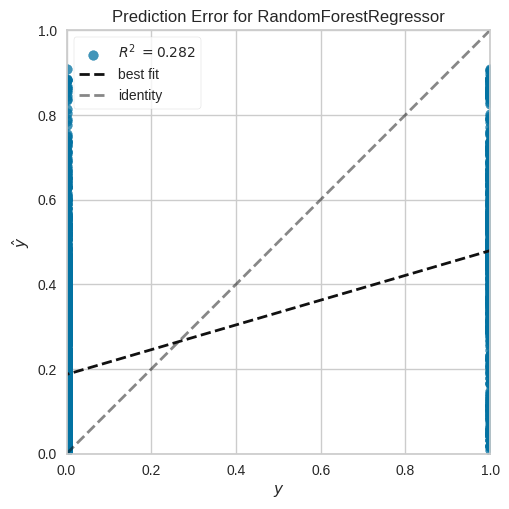

In [705]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

##Realizando cross validation

In [706]:
modelo

RandomForestRegressor(max_depth=5, random_state=42)

In [707]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_result = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_result

{'fit_time': array([1.13738799, 1.13022995, 1.14175963, 1.12689471, 1.24301791]),
 'score_time': array([0.01782179, 0.01946855, 0.01755667, 0.01723695, 0.03074217]),
 'test_RMSE': array([-0.36352502, -0.37441812, -0.36573031, -0.36697271, -0.37468098]),
 'test_MAE': array([-0.26696662, -0.27309865, -0.27181091, -0.27520048, -0.27765965]),
 'test_R2': array([0.34437575, 0.28496645, 0.27368391, 0.31476392, 0.29882739])}

##Feature importances

In [708]:
len(datos.columns)

42

In [709]:
importances = modelo.feature_importances_

In [710]:
features_importances = pd.DataFrame({'Features': X.columns, 'Importances':(importances*100).round(2)}).sort_values(by=['Importances', 'Features'], ascending=[False, True])
features_importances

,Features,Importances
24,onehotencoder__Contract_Month-to-month,47.74
35,tenure,14.83
4,onehotencoder__InternetService_Fiber optic,12.32
38,Charges.Monthly,6.80
39,Charges.Total,3.78
40,Cuentas_Diarias,3.42
15,onehotencoder__TechSupport_No,1.66
29,onehotencoder__PaymentMethod_Electronic check,1.42
9,onehotencoder__OnlineBackup_No,1.26
6,onehotencoder__OnlineSecurity_No,0.99


In [711]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0, 35, 5)]

for i in ct_features:
  selected_features = features_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,0.4046,0.3747,0.3722,0.3727,0.3721,0.372,0.3719
MAE,0.3270,0.2759,0.2746,0.2742,0.2740,0.274,0.2740
R2,0.1509,0.2718,0.2814,0.2795,0.2817,0.282,0.2824


In [712]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(15, 21)

for i in ct_features:
  selected_features = features_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metricas.values())

resultados

,15,16,17,18,19,20
RMSE,0.3727,0.3727,0.3724,0.3723,0.3721,0.3721
MAE,0.2742,0.2742,0.2740,0.2741,0.2740,0.2740
R2,0.2795,0.2795,0.2806,0.2810,0.2816,0.2817


In [713]:
selected_features = features_importances['Features'].values[:18]
X_selected_features = X[selected_features]
X_selected_features

,onehotencoder__Contract_Month-to-month,tenure,onehotencoder__InternetService_Fiber optic,Charges.Monthly,Charges.Total,Cuentas_Diarias,onehotencoder__TechSupport_No,onehotencoder__PaymentMethod_Electronic check,onehotencoder__OnlineBackup_No,onehotencoder__OnlineSecurity_No,onehotencoder__Contract_One year,onehotencoder__MultipleLines_No phone service,onehotencoder__Contract_Two year,onehotencoder__StreamingTV_No,PhoneService,onehotencoder__StreamingTV_Yes,PaperlessBilling,onehotencoder__MultipleLines_No
0,0.0,9.0,0.0,65.60,593.30,19.776667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,1.0,9.0,0.0,59.90,542.40,18.080000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,4.0,1.0,73.90,280.85,9.361667,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,1.0,13.0,1.0,98.00,1237.85,41.261667,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,1.0,3.0,1.0,83.90,267.40,8.913333,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,13.0,0.0,55.15,742.90,24.763333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7039,1.0,22.0,1.0,85.10,1873.70,62.456667,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
7040,1.0,2.0,0.0,50.30,92.75,3.091667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
7041,0.0,67.0,0.0,67.85,4627.65,154.255000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


##Optimizando hiperparámetros con GridSearchCV

In [714]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

In [715]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 150, 200]
}

In [716]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid=param_grid,
                          scoring='r2',
                          cv=cv)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [717]:
model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [718]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test, y_pred_grid)
metricas_model_grid

{'RMSE': 0.3705, 'MAE': 0.2745, 'R2': 0.2887}

In [719]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,15,16,17,18,19,20,modelo_grid
RMSE,0.3727,0.3727,0.3724,0.3723,0.3721,0.3721,0.3705
MAE,0.2742,0.2742,0.2740,0.2741,0.2740,0.2740,0.2745
R2,0.2795,0.2795,0.2806,0.2810,0.2816,0.2817,0.2887


##Serializando el modelo

In [720]:
import pickle

In [721]:
try:
  with open('/content/drive/MyDrive/Data_Science/Challenges/TelecomX-2/champion.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)

  print('Modelo Serializado con Éxito!')
except Exception as e:
  print(f'Se presentó un error al almacenar el modelo: {str(e)}')

Modelo Serializado con Éxito!


#📄Informe final


##Análisis 1

Luego de hacer una evaluación de nuestro modelo inicial nos encontramos con los siguientes resultados:

1. Precisión (Precision):
  
  **Valor**: 0.567 (aproximadamente 56.7%)

  **Interpretación**: La precisión indica la proporción de verdaderos positivos sobre el total de predicciones positivas. En este caso, el modelo tiene una precisión de aproximadamente 56.7%, lo que significa que de todas las instancias que predijo como positivas (churned), solo el 56.7% realmente lo son. Esto sugiere que hay un número considerable de falsos positivos.

2. Sensibilidad (Recall):

  **Valor**: 0.489 (aproximadamente 48.9%)
  
  **Interpretación**: La sensibilidad, o recall, mide la proporción de verdaderos positivos sobre el total de positivos reales. Un recall de 48.9% indica que el modelo está capturando menos de la mitad de los casos positivos reales. Esto es preocupante, especialmente en contextos donde es crítico identificar todos los casos positivos (por ejemplo, en la predicción de churn).

3. Exactitud (Accuracy):

  **Valor**: 0.766 (aproximadamente 76.6%)
  
  **Interpretación**: La exactitud es la proporción de predicciones correctas (tanto verdaderos positivos como verdaderos negativos) sobre el total de instancias. Una exactitud de 76.6% puede parecer buena a primera vista, pero en el contexto de un conjunto de datos desbalanceado, puede ser engañosa. Si la mayoría de las instancias pertenecen a la clase negativa, el modelo puede lograr una alta exactitud simplemente prediciendo la clase mayoritaria.

4. F1-Score:

  **Valor**: 0.525 (aproximadamente 52.5%)
  
  **Interpretación**: El F1-score es la media armónica entre precisión y recall. Un F1-score de 52.5% indica un rendimiento moderado del modelo, equilibrando tanto la precisión como la sensibilidad. Este valor sugiere que el modelo tiene dificultades para clasificar correctamente las instancias positivas.

  Conclusiones:
  
  Desbalance de Clases: Dado que la sensibilidad es relativamente baja, es probable que haya un desbalance en las clases. Esto puede ser un problema, especialmente si la clase positiva (churned) es la que más te interesa predecir.

  Mejoras Necesarias: Podrías considerar técnicas para manejar el desbalance de clases, como el sobremuestreo de la clase minoritaria, el submuestreo de la clase mayoritaria, o el uso de algoritmos que sean más robustos ante el desbalance.

  Evaluación Adicional: Además de estas métricas, sería útil observar la matriz de confusión para entender mejor cómo se están clasificando las instancias y si hay patrones en los errores del modelo.

  En resumen, aunque el modelo tiene una exactitud razonable, las métricas de precisión, recall y F1-score sugieren que hay margen de mejora, especialmente en la identificación de la clase positiva.